In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as iPipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [4]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Helping Functions

In [6]:
import pickle

In [7]:
def saveModel(fileName,model):
    with open(f'{fileName}.pickle',"wb") as file:
        pickle.dump(model,file)

In [8]:
def loadModel(modelFile):
    with open(modelFile, 'rb') as file:
        model = pickle.load(file)
        return model

# Load the data

In [9]:
# Load the train data
train_data = pd.read_csv('/kaggle/input/ml-layer-10-train/train.csv')

In [10]:
train_data

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      -0.027083   0.072947  -0.093659   0.053418  -0.085516  -0.102610   
1       0.070195   0.228641  -0.132860  -0.077761  -0.054993  -0.210365   
2       0.164312   0.052808  -0.058510   0.104724  -0.025886  -0.101427   
3       0.029730   0.113737   0.061113  -0.099329  -0.111600  -0.245942   
4       0.031364   0.142409  -0.160743  -0.076594  -0.062412  -0.264732   
...          ...        ...        ...        ...        ...        ...   
28515  -0.035973   0.072715  -0.270282   0.091208  -0.191320  -0.216611   
28516   0.069470   0.087150  -0.020916   0.015028   0.011037  -0.119964   
28517   0.131181   0.151207  -0.054255   0.175156   0.054449  -0.178458   
28518   0.031407   0.095880  -0.040718   0.093964  -0.046821  -0.085009   
28519   0.062807   0.148621  -0.112186   0.147993  -0.021369  -0.167056   

       feature_7  feature_8  feature_9  feature_10  ...  feature_763  \
0      -0.021217   0.016162  -0.184269    0.110335  ...    -0.183643   
1       0.127747  -0.132385  -0.161366    0.172764  ...    -0.123668   
2      -0.047177   0.091298  -0.094569    0.088062  ...     0.075410   
3       0.086520   0.071996   0.028319    0.207910  ...    -0.062511   
4       0.079197   0.026060  -0.217023    0.084656  ...    -0.193882   
...          ...        ...        ...         ...  ...          ...   
28515   0.021817   0.023942   0.013130    0.092222  ...     0.186235   
28516   0.064952  -0.029355  -0.040469    0.037754  ...    -0.064835   
28517  -0.031890  -0.071265  -0.031498    0.016970  ...    -0.054301   
28518   0.020143   0.047911  -0.145057    0.021328  ...    -0.115632   
28519   0.001904  -0.081141  -0.035111   -0.006730  ...    -0.124477   

       feature_764  feature_765  feature_766  feature_767  feature_768  \
0         0.091299    -0.037097     0.042607    -0.034361    -0.013748   
1         0.029626    -0.027345     0.055223    -0.179725     0.136841   
2         0.070125     0.043022     0.012972    -0.028920     0.096725   
3        -0.226912    -0.046011     0.011282    -0.095167     0.039979   
4         0.107297    -0.042355     0.046763    -0.192469     0.006463   
...            ...          ...          ...          ...          ...   
28515    -0.071871     0.134874    -0.046534    -0.049209     0.148759   
28516     0.015068    -0.055220    -0.039519    -0.006166    -0.014526   
28517     0.016186    -0.051473     0.055153    -0.106647    -0.011164   
28518     0.056439    -0.033905     0.031283    -0.095751     0.035147   
28519     0.049659    -0.132178     0.074743    -0.208911    -0.089137   

       label_1  label_2  label_3  label_4  
0           45      NaN        1        6  
1           45      NaN        1        6  
2           45      NaN        1        6  
3           45      NaN        1        6  
4           45      NaN        1        6  
...        ...      ...      ...      ...  
28515       39     29.0        1        6  
28516       39     29.0        1        6  
28517       39     29.0        1        6  
28518       39     29.0        1        6  
28519       39     29.0        1        6  

[28520 rows x 772 columns]

In [11]:
# Load the valid data
valid_data = pd.read_csv('/kaggle/input/ml-layer-10-valid/valid.csv')

In [12]:
valid_data

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0     0.089057   0.072797  -0.076338   0.115915  -0.019868  -0.081843   
1     0.023128   0.081442  -0.091982   0.021188  -0.062825  -0.080544   
2    -0.024480   0.114591   0.011653  -0.036223  -0.033679  -0.157527   
3     0.016545   0.076105  -0.080515   0.052122  -0.009976  -0.055965   
4     0.008559   0.036037  -0.043777   0.050584  -0.071815  -0.187329   
..         ...        ...        ...        ...        ...        ...   
745   0.137915   0.018654  -0.037206   0.129737  -0.050488  -0.162754   
746   0.006322   0.089902  -0.107340   0.062628  -0.107365   0.002409   
747   0.036668   0.125310  -0.055670   0.095170  -0.023049  -0.177663   
748   0.108926   0.144031  -0.039965   0.168810   0.000203  -0.109862   
749   0.065116   0.123392  -0.061682   0.072600  -0.033054  -0.111412   

     feature_7  feature_8  feature_9  feature_10  ...  feature_763  \
0    -0.036667   0.006569  -0.077875   -0.014323  ...     0.019353   
1     0.015052  -0.067189  -0.157901    0.062454  ...    -0.166827   
2     0.006977  -0.009106   0.064919    0.052810  ...    -0.050036   
3     0.005661   0.081433  -0.073674   -0.021476  ...     0.068674   
4     0.001175  -0.059212  -0.062420   -0.007780  ...    -0.128719   
..         ...        ...        ...         ...  ...          ...   
745  -0.025517   0.006736  -0.070894    0.109513  ...    -0.205148   
746  -0.008505   0.113627  -0.120738    0.064056  ...    -0.052288   
747  -0.010594  -0.025151  -0.022994    0.112005  ...    -0.203588   
748  -0.004499  -0.051219  -0.063053   -0.025315  ...    -0.061261   
749   0.006921   0.057283  -0.057980    0.025920  ...    -0.088550   

     feature_764  feature_765  feature_766  feature_767  feature_768  label_1  \
0       0.162292     0.056965    -0.004469    -0.040084     0.072282       45   
1       0.201730    -0.062621     0.058383    -0.075039     0.023428       45   
2       0.003152    -0.015791    -0.003751    -0.080954    -0.008283       45   
3       0.038822     0.062544    -0.039516    -0.056153    -0.041301       45   
4       0.041103     0.089034     0.033583    -0.151146    -0.064672       45   
..           ...          ...          ...          ...          ...      ...   
745     0.047071    -0.071692     0.109726    -0.073694    -0.057727       39   
746     0.039313    -0.085648    -0.079630    -0.066545    -0.163933       39   
747     0.025482    -0.100621     0.158005    -0.093643    -0.065391       39   
748     0.057384     0.013137     0.054172    -0.044807     0.000401       39   
749     0.144103    -0.056721     0.023952    -0.059126     0.065241       39   

     label_2  label_3  label_4  
0        NaN        1        6  
1        NaN        1        6  
2        NaN        1        6  
3        NaN        1        6  
4        NaN        1        6  
..       ...      ...      ...  
745     29.0        1        6  
746     29.0        1        6  
747     29.0        1        6  
748     29.0        1        6  
749     29.0        1        6  

[750 rows x 772 columns]

In [13]:
# Load the valid data
test_data = pd.read_csv('/kaggle/input/ml-layer-10-test/test.csv')

In [14]:
test_data

ID  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      1  -0.063023   0.085030  -0.057909   0.024293   0.028695  -0.113796   
1      2  -0.036403   0.115930  -0.066521   0.045771  -0.027250  -0.164679   
2      3   0.030672   0.045321  -0.163811   0.142376  -0.125894  -0.083943   
3      4  -0.000984   0.080593  -0.067086   0.005251  -0.141851  -0.125211   
4      5   0.059806   0.088846  -0.058021   0.133098  -0.083380  -0.026724   
..   ...        ...        ...        ...        ...        ...        ...   
739  740   0.188204   0.081176  -0.074022   0.137866  -0.095801  -0.109583   
740  741   0.038823   0.107162  -0.036177   0.018447  -0.017296  -0.132091   
741  742   0.144466   0.127490  -0.013127   0.186935  -0.086037  -0.019920   
742  743   0.065290   0.062607  -0.079184  -0.004357  -0.049856  -0.135997   
743  744   0.082318   0.064333  -0.048152   0.117243   0.001274  -0.023023   

     feature_7  feature_8  feature_9  ...  feature_759  feature_760  \
0     0.028477  -0.006041  -0.132434  ...    -0.160050     0.078897   
1     0.023611   0.056512  -0.171498  ...    -0.137038     0.042576   
2    -0.039693  -0.004867  -0.127951  ...     0.090191     0.038063   
3    -0.016161   0.106323  -0.203491  ...    -0.107041     0.028166   
4    -0.033793  -0.004055  -0.057890  ...     0.047907     0.026333   
..         ...        ...        ...  ...          ...          ...   
739  -0.120952   0.160029   0.018152  ...     0.000214     0.145774   
740  -0.032862   0.066820  -0.075804  ...    -0.009596     0.031382   
741  -0.080656  -0.077188  -0.096411  ...    -0.014504    -0.007935   
742   0.007844  -0.026237  -0.028936  ...    -0.050544     0.004148   
743  -0.016179  -0.012462  -0.103211  ...    -0.052607    -0.046915   

     feature_761  feature_762  feature_763  feature_764  feature_765  \
0       0.120168    -0.160152    -0.200884     0.046231    -0.115850   
1       0.006788    -0.207013    -0.205184    -0.053462    -0.003775   
2       0.070423    -0.253409    -0.072147     0.016236    -0.144047   
3      -0.073713    -0.073180    -0.109380    -0.027901    -0.006863   
4       0.012204    -0.245772    -0.044506     0.058273    -0.005203   
..           ...          ...          ...          ...          ...   
739     0.184040    -0.209057     0.241627     0.137966     0.062686   
740     0.005880    -0.080454    -0.096417     0.027168    -0.050838   
741     0.235483    -0.492386    -0.285306     0.156416     0.007422   
742    -0.017070    -0.124486    -0.000924     0.016647    -0.064855   
743     0.034281    -0.084330    -0.172586    -0.013456    -0.091373   

     feature_766  feature_767  feature_768  
0       0.182974     0.047106    -0.118783  
1      -0.035003    -0.041118    -0.079211  
2      -0.122405    -0.063079    -0.188233  
3       0.016840    -0.171139     0.086868  
4      -0.104552     0.002035    -0.091528  
..           ...          ...          ...  
739    -0.072823     0.017248     0.101544  
740    -0.069327    -0.010809    -0.067903  
741    -0.258595     0.042989    -0.031583  
742    -0.018116     0.000874    -0.002627  
743    -0.014995    -0.097099    -0.014838  

[744 rows x 769 columns]

In [15]:
# Split data into features (X) and labels (Y) for each label for train dataset
X_train = train_data.loc[:, 'feature_1':'feature_768']
Y_speaker_train = train_data['label_1']
Y_age_train = train_data['label_2']
Y_gender_train = train_data['label_3']
Y_accent_train = train_data['label_4']

In [16]:
# Split data into features (X) and labels (Y) for each label for valid dataset
X_valid = valid_data.loc[:, 'feature_1':'feature_768']
Y_speaker_valid = valid_data['label_1']
Y_age_valid = valid_data['label_2']
Y_gender_valid = valid_data['label_3']
Y_accent_valid = valid_data['label_4']

In [17]:
X_train

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      -0.027083   0.072947  -0.093659   0.053418  -0.085516  -0.102610   
1       0.070195   0.228641  -0.132860  -0.077761  -0.054993  -0.210365   
2       0.164312   0.052808  -0.058510   0.104724  -0.025886  -0.101427   
3       0.029730   0.113737   0.061113  -0.099329  -0.111600  -0.245942   
4       0.031364   0.142409  -0.160743  -0.076594  -0.062412  -0.264732   
...          ...        ...        ...        ...        ...        ...   
28515  -0.035973   0.072715  -0.270282   0.091208  -0.191320  -0.216611   
28516   0.069470   0.087150  -0.020916   0.015028   0.011037  -0.119964   
28517   0.131181   0.151207  -0.054255   0.175156   0.054449  -0.178458   
28518   0.031407   0.095880  -0.040718   0.093964  -0.046821  -0.085009   
28519   0.062807   0.148621  -0.112186   0.147993  -0.021369  -0.167056   

       feature_7  feature_8  feature_9  feature_10  ...  feature_759  \
0      -0.021217   0.016162  -0.184269    0.110335  ...    -0.056169   
1       0.127747  -0.132385  -0.161366    0.172764  ...    -0.183478   
2      -0.047177   0.091298  -0.094569    0.088062  ...     0.056677   
3       0.086520   0.071996   0.028319    0.207910  ...    -0.117388   
4       0.079197   0.026060  -0.217023    0.084656  ...    -0.207969   
...          ...        ...        ...         ...  ...          ...   
28515   0.021817   0.023942   0.013130    0.092222  ...     0.023872   
28516   0.064952  -0.029355  -0.040469    0.037754  ...    -0.031996   
28517  -0.031890  -0.071265  -0.031498    0.016970  ...    -0.049589   
28518   0.020143   0.047911  -0.145057    0.021328  ...    -0.000436   
28519   0.001904  -0.081141  -0.035111   -0.006730  ...    -0.090145   

       feature_760  feature_761  feature_762  feature_763  feature_764  \
0         0.067435    -0.019936    -0.273023    -0.183643     0.091299   
1         0.020278    -0.022319    -0.295371    -0.123668     0.029626   
2        -0.010740     0.064840    -0.310890     0.075410     0.070125   
3        -0.005819    -0.040344    -0.170511    -0.062511    -0.226912   
4         0.008716     0.021783    -0.232735    -0.193882     0.107297   
...            ...          ...          ...          ...          ...   
28515     0.050159     0.166892    -0.186158     0.186235    -0.071871   
28516     0.000576    -0.000357    -0.236055    -0.064835     0.015068   
28517     0.031112     0.087500    -0.133849    -0.054301     0.016186   
28518     0.031051    -0.004681    -0.075844    -0.115632     0.056439   
28519     0.050240     0.121727    -0.176823    -0.124477     0.049659   

       feature_765  feature_766  feature_767  feature_768  
0        -0.037097     0.042607    -0.034361    -0.013748  
1        -0.027345     0.055223    -0.179725     0.136841  
2         0.043022     0.012972    -0.028920     0.096725  
3        -0.046011     0.011282    -0.095167     0.039979  
4        -0.042355     0.046763    -0.192469     0.006463  
...            ...          ...          ...          ...  
28515     0.134874    -0.046534    -0.049209     0.148759  
28516    -0.055220    -0.039519    -0.006166    -0.014526  
28517    -0.051473     0.055153    -0.106647    -0.011164  
28518    -0.033905     0.031283    -0.095751     0.035147  
28519    -0.132178     0.074743    -0.208911    -0.089137  

[28520 rows x 768 columns]

Now lets find best classification model for each label. Lets classify Label 1 first.

# Find best classifier model for Label 1

Check the nature of Label 1

In [18]:
Y_speaker_train.describe()

count    28520.000000
mean        30.498843
std         17.328389
min          1.000000
25%         15.000000
50%         30.000000
75%         46.000000
max         60.000000
Name: label_1, dtype: float64

Remove outliers if there are any of them

In [19]:
robustScaler= RobustScaler()
X_train = pd.DataFrame(robustScaler.fit_transform(X_train))
X_valid = pd.DataFrame(robustScaler.fit_transform(X_valid))

Next check are there any null values in the Label 1 column.

In [20]:
Y_speaker_train_df = Y_speaker_train.to_frame()

In [21]:
# Check for null values in the specified column
null_values = Y_speaker_train_df['label_1'].isnull()

# Count the number of null values in the column
null_count = null_values.sum()

# Print the number of null values
print(f"Number of null values in 'label_1': {null_count}")

Number of null values in 'label_1': 0


Therefore there is not any null values.
Now Let's check the value distribution with a graph.

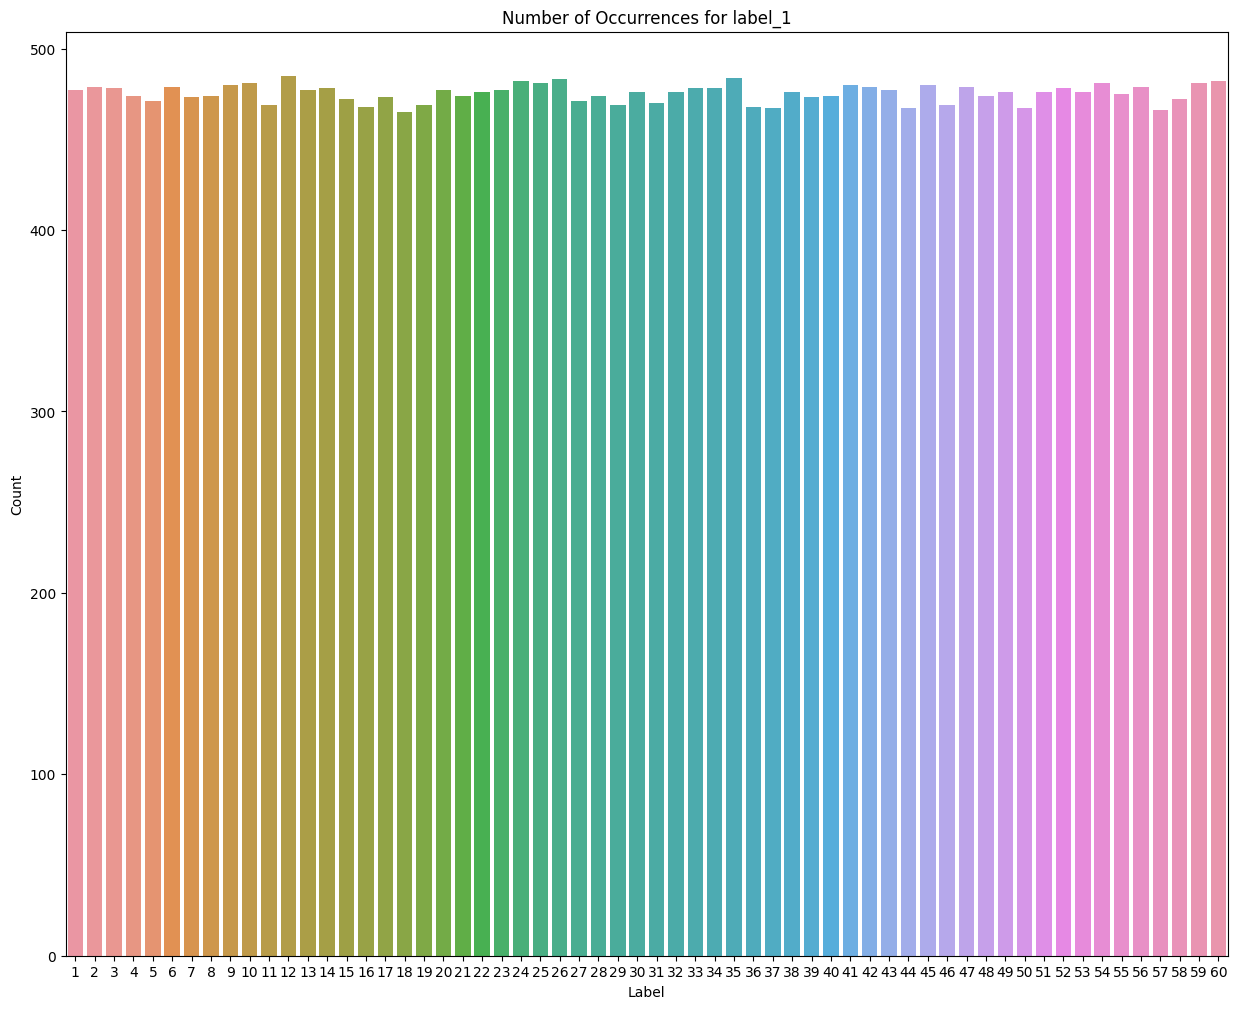

In [22]:
# Create a countplot using Seaborn
plt.figure(figsize=(15, 12))
sns.countplot(data=Y_speaker_train_df, x='label_1')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Occurrences for label_1')
plt.show()

No bias in the dataset.

Now check the correlation between the features

In [23]:
X_train_label_1 = X_train.copy()
X_valid_label_1 = X_valid.copy()
X_test_label_1 = test_data.loc[:, 'feature_1':'feature_768'].copy()

In [24]:
corr_before_feature_engineering_label_1 = X_train_label_1.corr()

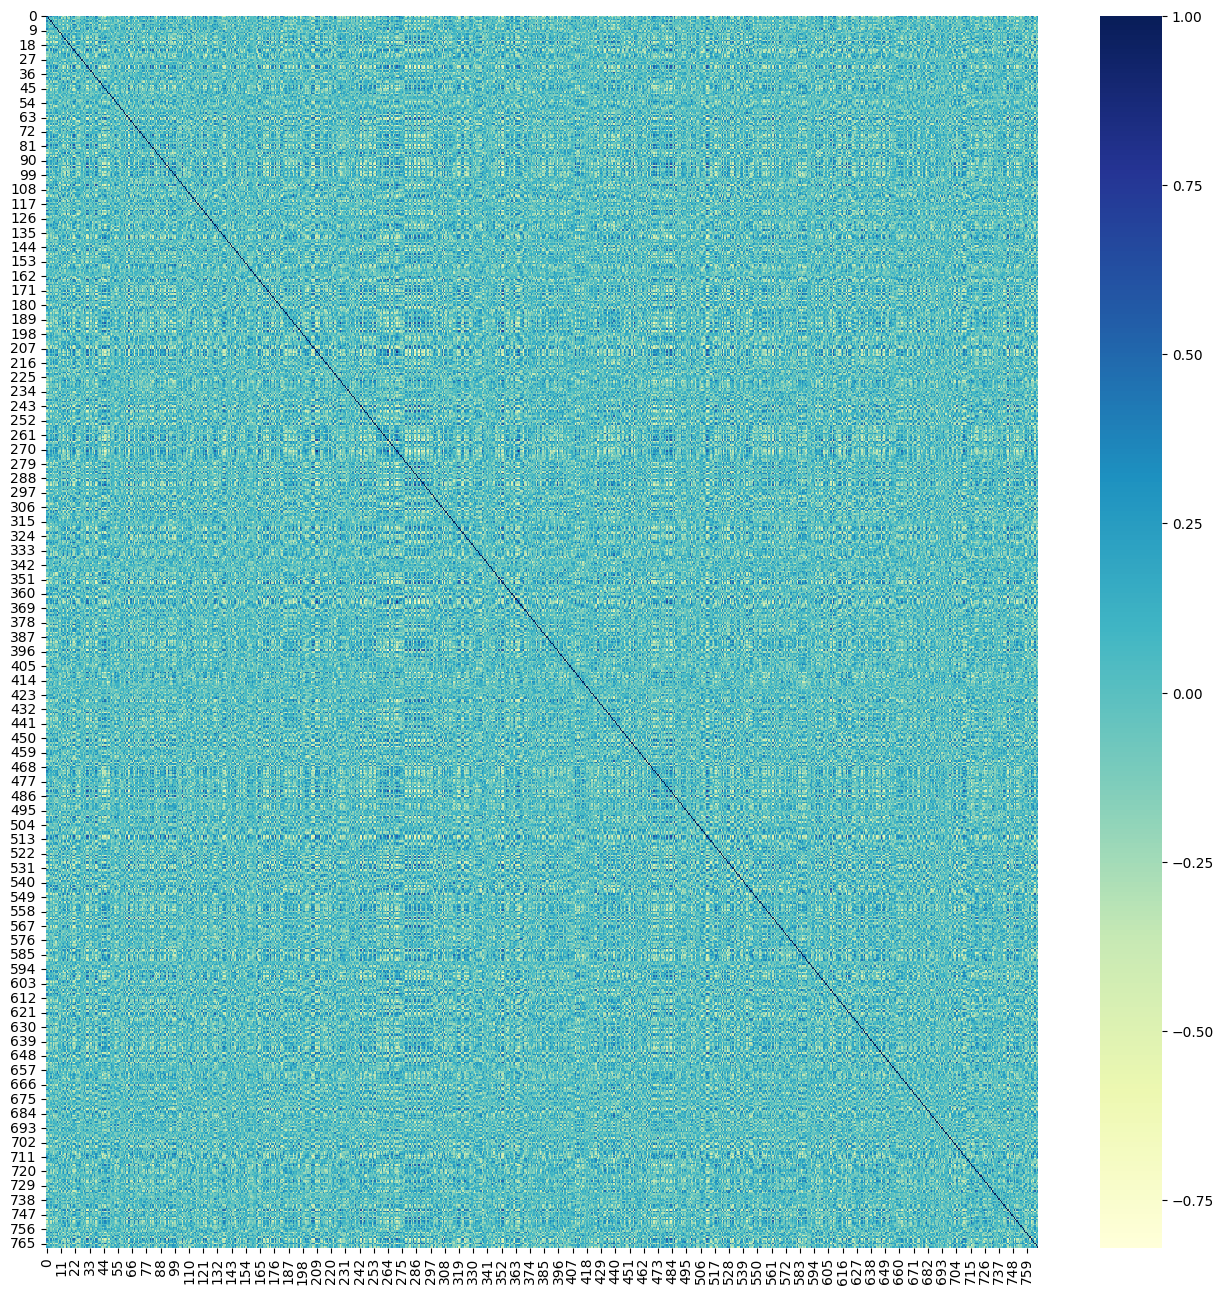

In [25]:
plt.figure(figsize=(16, 16))
plt.xticks(rotation=90)
sns.heatmap(corr_before_feature_engineering_label_1, cmap="YlGnBu")
plt.savefig("All_data.png")

Now lets find best classifier model to predict Label 1

In [25]:
score_knn = cross_val_score(KNeighborsClassifier(n_neighbors=10), X_train_label_1, Y_speaker_train,cv=3)
score_svm = cross_val_score(svm.SVC(kernel='linear', probability=True, class_weight='balanced'),X_train_label_1, Y_speaker_train,cv=3)
score_rfc = cross_val_score(RandomForestClassifier(n_estimators=10),X_train_label_1, Y_speaker_train, cv=3)
print(f"score for knn: {score_knn}")
print(f"score for svm: {score_svm}")
print(f"score_rfc:{score_rfc}")

score for knn: [0.87630167 0.875355   0.87481591]
score for svm: [0.95245608 0.95108867 0.95371344]
score_rfc:[0.52308825 0.53213422 0.53124343]


Therefore SVM has the best accuracy. Lets continue with SVC model

Now lets predict with SVC model

In [40]:
svc_label_1 = svm.SVC(kernel='rbf')
svc_label_1.fit(X_train_label_1, Y_speaker_train_df)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


SVC()

In [41]:
y_predict_label_1 = svc_label_1.predict(X_valid_label_1)

In [42]:
print(metrics.confusion_matrix(Y_speaker_valid, y_predict_label_1))
print(metrics.accuracy_score(Y_speaker_valid, y_predict_label_1))
print(metrics.precision_score(Y_speaker_valid, y_predict_label_1, average = 'weighted'))
print(metrics.recall_score(Y_speaker_valid, y_predict_label_1, average = 'weighted'))

[[12  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 20  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  1  9]]
0.9533333333333334
0.9605400488400491
0.9533333333333334


Lets do the hyper parameter tuning and find the best model by changing the parameters. I use PCA for feature reduction task.

In [28]:
# Create a pipeline with PCA, SVM, and grid search for hyperparameter tuning
pipeline = Pipeline([
    ('pca', PCA()),
    ('svm', svm.SVC())
])

In [29]:
# Define the parameter grid for grid search
param_grid = {
    'pca__n_components': [0.95],  # Number of principal components to retain
    'svm__C': [10],         # SVM regularization parameter
    'svm__kernel': ['rbf']         # SVM kernel
}

In [30]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, Y_speaker_train)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('pca', PCA()), ('svm', SVC())]),
             param_grid={'pca__n_components': [0.95], 'svm__C': [10],
                         'svm__kernel': ['rbf']},
             scoring='accuracy')

In [31]:
# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [32]:
best_params

{'pca__n_components': 0.95, 'svm__C': 10, 'svm__kernel': 'rbf'}

In [33]:
# Evaluate the best model on the test set
accuracy = best_model.score(X_valid, Y_speaker_valid)

In [34]:
y_pred_with_grid_search_label_1 = best_model.predict(X_valid)

In [35]:
print(metrics.confusion_matrix(Y_speaker_valid, y_pred_with_grid_search_label_1))
print(metrics.accuracy_score(Y_speaker_valid, y_pred_with_grid_search_label_1))
print(metrics.precision_score(Y_speaker_valid, y_pred_with_grid_search_label_1, average = 'weighted'))
print(metrics.recall_score(Y_speaker_valid, y_pred_with_grid_search_label_1, average = 'weighted'))

[[13  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]
0.9666666666666667
0.9700681773564126
0.9666666666666667


Using SHAP Explainable AI

In [45]:
def svc_predictor_label_1(X):
    return best_model.decision_function(X)

In [ ]:
explainer_label_1 = shap.Explainer(svc_predictor_label_1, X_train_label_1)
shap_values_label_1 = explainer_label_1.shap_values(X_valid_label_1)
shap.summary_plot(shap_values_label_1, X_valid_label_1, feature_names=X.columns)

In [37]:
saveModel("best_pca__n_0.95_svm__C_10_svm__kernel_rbf", best_model)

Create CSV output file

In [38]:
y_predict_final_label_1 = best_model.predict(X_test_label_1)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [39]:
y_predict_final_label_1.shape

(744,)

In [40]:
y_predict_final_label_1_series = pd.Series(y_predict_final_label_1, name='Predicted_Label_1')

In [41]:
final_result_label_1 = pd.concat([test_data['ID'], y_predict_final_label_1_series], axis=1)
final_result_label_1

ID  Predicted_Label_1
0      1                 29
1      2                 29
2      3                 29
3      4                 29
4      5                 29
..   ...                ...
739  740                 29
740  741                 29
741  742                 29
742  743                 29
743  744                 29

[744 rows x 2 columns]

In [42]:
final_result_label_1.to_csv('190050K layer 10 label 1.csv', index=False)

Let find classification model for Label 2

# Find best classifier model for Label 2

Check the nature of Label 2

In [43]:
Y_age_train.describe()

count    28040.000000
mean        27.975107
std          5.735913
min         22.000000
25%         25.000000
50%         27.000000
75%         30.000000
max         61.000000
Name: label_2, dtype: float64

In [44]:
robustScaler= RobustScaler()
X_train = pd.DataFrame(robustScaler.fit_transform(X_train))
X_valid = pd.DataFrame(robustScaler.fit_transform(X_valid))

Next check are there any null values in the Label 2 column.

In [45]:
Y_age_train_df = Y_age_train.to_frame()

In [46]:
null_values = Y_age_train_df['label_2'].isnull()
null_count = null_values.sum()

print(f"Number of null values in 'label_2': {null_count}")

Number of null values in 'label_2': 480


In [47]:
print(f"Percentage of null values in 'label_2': {null_count/X_train.shape[0]*100}%")

Percentage of null values in 'label_2': 1.6830294530154277%


Therefore the percentage of NULL values are low. Therefore I can elemenate these rows for future calculations.

In [48]:
preprocessed_train_data = train_data[train_data['label_2'].notna()]
preprocessed_valid_data = valid_data[train_data['label_2'].notna()]

/tmp/ipykernel_32/799142066.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  preprocessed_valid_data = valid_data[train_data['label_2'].notna()]


In [49]:
preprocessed_train_data

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
480     0.053179   0.094833  -0.098983   0.131190  -0.031974  -0.049086   
481     0.033278   0.059124  -0.020353   0.168918   0.036165  -0.117302   
482     0.046853   0.076299  -0.012859   0.089680   0.046729  -0.000054   
483     0.001946   0.060066   0.012458   0.001349  -0.057288  -0.219725   
484     0.046541   0.113568  -0.009204   0.058154   0.027733  -0.095826   
...          ...        ...        ...        ...        ...        ...   
28515  -0.035973   0.072715  -0.270282   0.091208  -0.191320  -0.216611   
28516   0.069470   0.087150  -0.020916   0.015028   0.011037  -0.119964   
28517   0.131181   0.151207  -0.054255   0.175156   0.054449  -0.178458   
28518   0.031407   0.095880  -0.040718   0.093964  -0.046821  -0.085009   
28519   0.062807   0.148621  -0.112186   0.147993  -0.021369  -0.167056   

       feature_7  feature_8  feature_9  feature_10  ...  feature_763  \
480     0.038929   0.091135  -0.107005    0.018532  ...    -0.084282   
481    -0.081979  -0.070096  -0.161345    0.106618  ...    -0.051955   
482    -0.045814   0.023595  -0.104441    0.025995  ...    -0.202896   
483     0.001473   0.036990  -0.210818    0.055353  ...    -0.175213   
484     0.072213  -0.013832  -0.007329    0.074815  ...    -0.142571   
...          ...        ...        ...         ...  ...          ...   
28515   0.021817   0.023942   0.013130    0.092222  ...     0.186235   
28516   0.064952  -0.029355  -0.040469    0.037754  ...    -0.064835   
28517  -0.031890  -0.071265  -0.031498    0.016970  ...    -0.054301   
28518   0.020143   0.047911  -0.145057    0.021328  ...    -0.115632   
28519   0.001904  -0.081141  -0.035111   -0.006730  ...    -0.124477   

       feature_764  feature_765  feature_766  feature_767  feature_768  \
480       0.057429    -0.064677     0.017584    -0.007926    -0.144536   
481       0.121809     0.007508     0.074416     0.000140     0.115385   
482       0.099567    -0.069376     0.061420     0.003834     0.000445   
483      -0.030503    -0.081459     0.106127     0.039627     0.025073   
484       0.081530    -0.058456    -0.049127    -0.061282     0.041392   
...            ...          ...          ...          ...          ...   
28515    -0.071871     0.134874    -0.046534    -0.049209     0.148759   
28516     0.015068    -0.055220    -0.039519    -0.006166    -0.014526   
28517     0.016186    -0.051473     0.055153    -0.106647    -0.011164   
28518     0.056439    -0.033905     0.031283    -0.095751     0.035147   
28519     0.049659    -0.132178     0.074743    -0.208911    -0.089137   

       label_1  label_2  label_3  label_4  
480          5     25.0        1        6  
481          5     25.0        1        6  
482          5     25.0        1        6  
483          5     25.0        1        6  
484          5     25.0        1        6  
...        ...      ...      ...      ...  
28515       39     29.0        1        6  
28516       39     29.0        1        6  
28517       39     29.0        1        6  
28518       39     29.0        1        6  
28519       39     29.0        1        6  

[28040 rows x 772 columns]

In [50]:
preprocessed_valid_data

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
480  -0.053126   0.047107  -0.000601  -0.016190  -0.047918  -0.136576   
481   0.035679   0.133866   0.014411   0.054434  -0.094848  -0.242764   
482  -0.032471   0.068902   0.024796   0.047457  -0.027882  -0.239642   
483  -0.172674   0.018524  -0.059113   0.083716  -0.176742  -0.139018   
484   0.088119   0.147901  -0.081577   0.146499  -0.002146  -0.166457   
..         ...        ...        ...        ...        ...        ...   
745   0.137915   0.018654  -0.037206   0.129737  -0.050488  -0.162754   
746   0.006322   0.089902  -0.107340   0.062628  -0.107365   0.002409   
747   0.036668   0.125310  -0.055670   0.095170  -0.023049  -0.177663   
748   0.108926   0.144031  -0.039965   0.168810   0.000203  -0.109862   
749   0.065116   0.123392  -0.061682   0.072600  -0.033054  -0.111412   

     feature_7  feature_8  feature_9  feature_10  ...  feature_763  \
480  -0.033351  -0.012838  -0.085030    0.048644  ...    -0.147846   
481   0.038504  -0.064582  -0.181141   -0.011148  ...    -0.158165   
482  -0.051374  -0.054866   0.014267    0.055184  ...    -0.241522   
483  -0.095623  -0.021401  -0.161374    0.058073  ...    -0.160141   
484   0.006811  -0.033338  -0.098745   -0.071658  ...    -0.236975   
..         ...        ...        ...         ...  ...          ...   
745  -0.025517   0.006736  -0.070894    0.109513  ...    -0.205148   
746  -0.008505   0.113627  -0.120738    0.064056  ...    -0.052288   
747  -0.010594  -0.025151  -0.022994    0.112005  ...    -0.203588   
748  -0.004499  -0.051219  -0.063053   -0.025315  ...    -0.061261   
749   0.006921   0.057283  -0.057980    0.025920  ...    -0.088550   

     feature_764  feature_765  feature_766  feature_767  feature_768  label_1  \
480     0.010868     0.028079     0.079490    -0.049118    -0.006200       59   
481     0.049000     0.016190     0.108906    -0.071301    -0.060646       50   
482    -0.134968     0.011043     0.154269     0.013863    -0.139346       50   
483    -0.059906    -0.094164     0.198352    -0.080394     0.038463       50   
484     0.158462     0.031994     0.195708    -0.145361     0.013827       50   
..           ...          ...          ...          ...          ...      ...   
745     0.047071    -0.071692     0.109726    -0.073694    -0.057727       39   
746     0.039313    -0.085648    -0.079630    -0.066545    -0.163933       39   
747     0.025482    -0.100621     0.158005    -0.093643    -0.065391       39   
748     0.057384     0.013137     0.054172    -0.044807     0.000401       39   
749     0.144103    -0.056721     0.023952    -0.059126     0.065241       39   

     label_2  label_3  label_4  
480     31.0        0        6  
481     24.0        1        6  
482     24.0        1        6  
483     24.0        1        6  
484     24.0        1        6  
..       ...      ...      ...  
745     29.0        1        6  
746     29.0        1        6  
747     29.0        1        6  
748     29.0        1        6  
749     29.0        1        6  

[270 rows x 772 columns]

In [51]:
X_train = preprocessed_train_data.loc[:, 'feature_1':'feature_768']
Y_age_train = preprocessed_train_data['label_2']

In [52]:
X_valid = preprocessed_valid_data.loc[:, 'feature_1':'feature_768']
Y_age_valid = preprocessed_valid_data['label_2']

Now Let's check the value distribution with a graph.

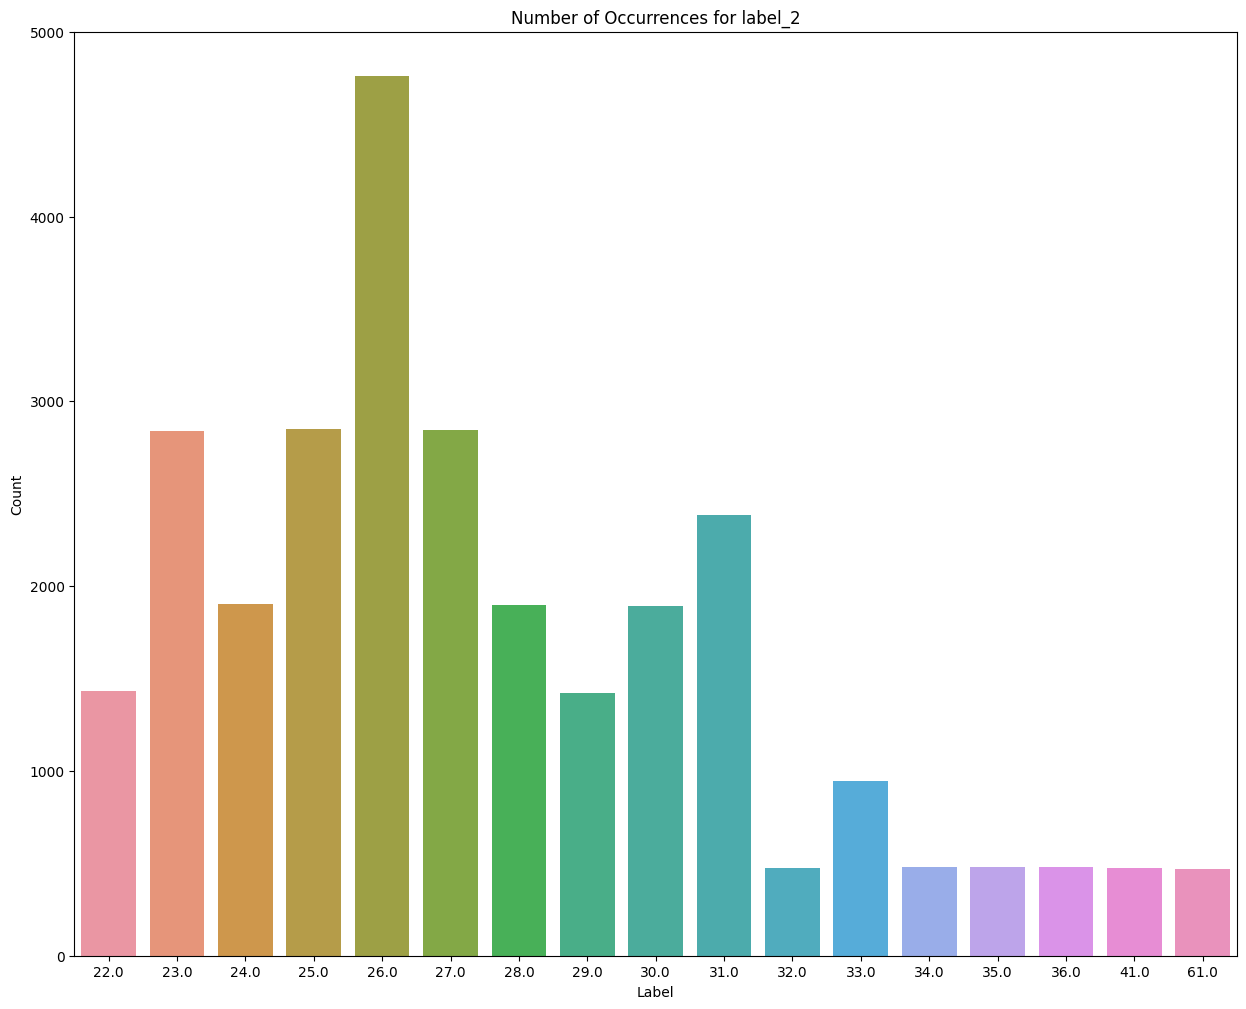

In [53]:
plt.figure(figsize=(15, 12))
sns.countplot(data=preprocessed_train_data, x='label_2')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Occurrences for label_2')
plt.show()

Now check the correlation between the features

In [54]:
X_train_label_2 = X_train.copy()
X_valid_label_2 = X_valid.copy()
X_test_label_2 = test_data.loc[:, 'feature_1':'feature_768'].copy()

In [55]:
corr_before_feature_engineering_label_2 = X_train_label_2.corr()

<Axes: >

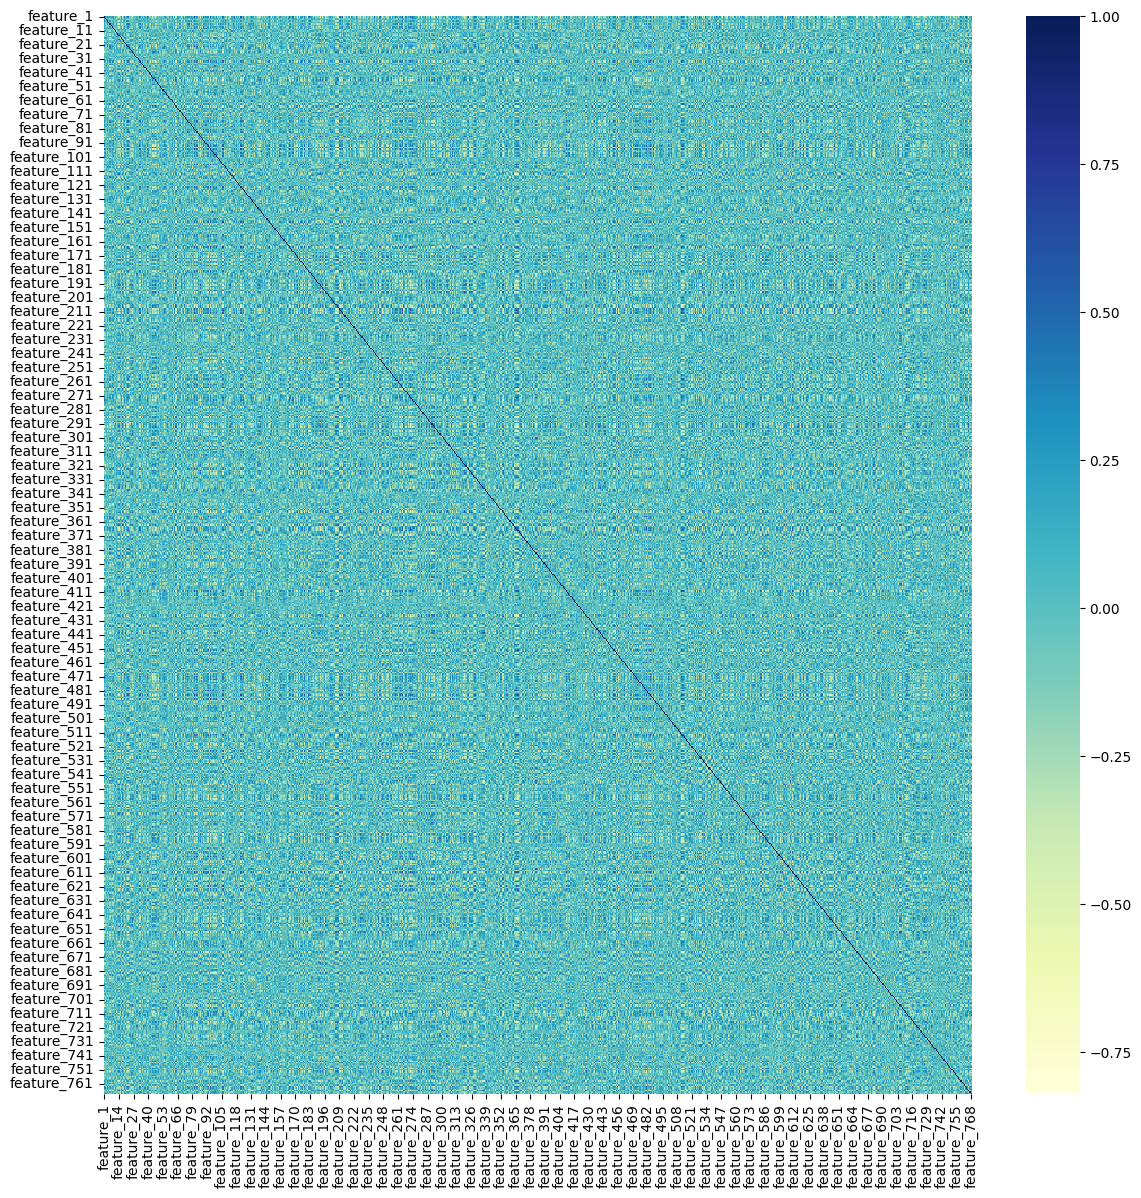

In [56]:
plt.figure(figsize=(14, 14))
plt.xticks(rotation=90)
sns.heatmap(corr_before_feature_engineering_label_2, cmap="YlGnBu")

Now select best model to predict 'Label_2'

In [57]:
score_knn = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train_label_2, Y_age_train,cv=3)
score_svm = cross_val_score(svm.SVC(kernel='linear', probability=True, class_weight='balanced'),X_train_label_2, Y_age_train,cv=3)
score_rfc = cross_val_score(RandomForestClassifier(n_estimators=5),X_train_label_2, Y_age_train, cv=3)
print(f"Score for knn: {score_knn}")
print(f"Score for svm: {score_svm}")
print(f"Score for RFC:{score_rfc}")

Score for knn: [0.29175136 0.43382904 0.30644126]
Score for svm: [0.27324275 0.40408687 0.30023539]
Score for RFC:[0.15855355 0.1836953  0.16787931]


Therefore KNN has the best score. Next SVM. Therefore lets try with both models.

First lets predict with SVM model

In [58]:
svc_label_2 = svm.SVC(kernel='rbf')
svc_label_2.fit(X_train_label_2, Y_age_train)

SVC()

In [59]:
y_predict_label_2 = svc_label_2.predict(X_valid_label_2)

In [60]:
print(metrics.confusion_matrix(Y_age_valid, y_predict_label_2))
print(metrics.accuracy_score(Y_age_valid, y_predict_label_2))
print(metrics.precision_score(Y_age_valid, y_predict_label_2, average = 'weighted'))
print(metrics.recall_score(Y_age_valid, y_predict_label_2, average = 'weighted'))

[[ 6  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0 12  1  0  1  0  1  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0 13  0  0  1  0  0  2  0  0  0]
 [ 0  0  0  1 42  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  3 23  0  0  0  1  1  0  0]
 [ 0  0  0  0  1  2 22  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0 23  0  0  0  0  0]
 [ 0  0  0  1  2  0  0  0 34  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  1 29  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0 10  0]
 [ 0  1  0  0  3  0  0  0  0  0  0  0 10]]
0.8777777777777778
0.8942088274645745
0.8777777777777778


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Lets do the hyper parameter tuning and find the best model by changing the parameters. I use PCA for feature reduction task

In [61]:
# Create a pipeline with PCA, SVM, and grid search for hyperparameter tuning
pipeline = Pipeline([
    ('pca', PCA()),
    ('svm', svm.SVC())
])

Check the perfoermance of the model by changing parameters in the following.

In [62]:
# Define the parameter grid for grid search
param_grid = {
    'pca__n_components': [0.92],
    'svm__C': [27],         
    'svm__kernel': ['rbf'], 
    'svm__class_weight': ['balanced'],
    'svm__probability': [True]
}

In [63]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, Y_age_train)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('pca', PCA()), ('svm', SVC())]),
             param_grid={'pca__n_components': [0.92], 'svm__C': [27],
                         'svm__class_weight': ['balanced'],
                         'svm__kernel': ['rbf'], 'svm__probability': [True]},
             scoring='accuracy')

In [64]:
# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [65]:
best_params

{'pca__n_components': 0.92,
 'svm__C': 27,
 'svm__class_weight': 'balanced',
 'svm__kernel': 'rbf',
 'svm__probability': True}

In [66]:
accuracy = best_model.score(X_valid, Y_age_valid)

In [67]:
accuracy

0.9333333333333333

In [68]:
y_pred_with_grid_search_label_2 = best_model.predict(X_valid)

In [69]:
print(metrics.confusion_matrix(Y_age_valid, y_pred_with_grid_search_label_2))
print(metrics.accuracy_score(Y_age_valid, y_pred_with_grid_search_label_2))
print(metrics.precision_score(Y_age_valid, y_pred_with_grid_search_label_2, average = 'weighted'))
print(metrics.recall_score(Y_age_valid, y_pred_with_grid_search_label_2, average = 'weighted'))

[[ 6  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0 16  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0 43  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0 27  0  0  0  0  1  0  0]
 [ 0  1  0  0  1  1 22  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 36  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  1 30  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0 10  0]
 [ 0  3  0  0  1  0  0  0  0  0  0  0 10]]
0.9333333333333333
0.9468735810460457
0.9333333333333333


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
y_predict_final_label_2 = best_model.predict(X_test_label_2)

Now lets predict with KNN model

In [71]:
knn_label_2 = KNeighborsClassifier(n_neighbors=5)
knn_label_2.fit(X_train_label_2, Y_age_train)

KNeighborsClassifier()

In [72]:
y_predict_label_2 = knn_label_2.predict(X_valid_label_2)

In [73]:
print(metrics.confusion_matrix(Y_age_valid, y_predict_label_2))
print(metrics.accuracy_score(Y_age_valid, y_predict_label_2))
print(metrics.precision_score(Y_age_valid, y_predict_label_2, average = 'weighted'))
print(metrics.recall_score(Y_age_valid, y_predict_label_2, average = 'weighted'))

[[ 7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  1  0  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  1  0  0  0  0  0]
 [ 0  2  0 16  0  0  0  0  1  0  0  0]
 [ 0  1  1  1 40  0  0  0  0  0  0  0]
 [ 0  2  1  0  0 26  0  0  0  0  0  0]
 [ 0  2  1  0  1  0 21  0  0  0  0  0]
 [ 0  0  0  0  3  0  0 22  0  0  0  0]
 [ 0  2  0  1  2  1  0  0 31  0  0  0]
 [ 0  1  0  1  1  0  0  0  0 29  0  0]
 [ 0  0  0  1  0  0  0  0  0  0 10  0]
 [ 0  1  0  0  3  0  0  0  0  0  0 10]]
0.8814814814814815
0.9051233788502306
0.8814814814814815


Lets do the hyper parameter tuning and find the best model by changing the parameters. I use PCA for feature reduction task

In [74]:
pipeline = Pipeline([
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])

Check best model by changinge following parameters

In [75]:
# Define the parameter grid for grid search
param_grid = {
    'pca__n_components': [0.80, 0.97, 0.98, 0.99],  # Number of principal components
    'knn__n_neighbors': [2, 3, 4],  
    'knn__weights': ['distance'],
}

In [76]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, Y_age_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [2, 3, 4],
                         'knn__weights': ['distance'],
                         'pca__n_components': [0.8, 0.97, 0.98, 0.99]},
             scoring='accuracy')

In [77]:
# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [78]:
best_params

{'knn__n_neighbors': 2, 'knn__weights': 'distance', 'pca__n_components': 0.99}

In [79]:
accuracy = best_model.score(X_valid, Y_age_valid)

In [80]:
accuracy

0.9185185185185185

In [81]:
y_pred_with_grid_search_label_2 = best_model.predict(X_valid)

In [82]:
print(metrics.confusion_matrix(Y_age_valid, y_pred_with_grid_search_label_2))
print(metrics.accuracy_score(Y_age_valid, y_pred_with_grid_search_label_2))
print(metrics.precision_score(Y_age_valid, y_pred_with_grid_search_label_2, average = 'weighted'))
print(metrics.recall_score(Y_age_valid, y_pred_with_grid_search_label_2, average = 'weighted'))

[[ 7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 17  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0 43  0  0  0  0  0  0  0  0]
 [ 0  1  1  0  0 27  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  1 21  0  1  0  0  0  0]
 [ 0  0  0  0  2  0  0 23  0  0  0  0  0]
 [ 0  0  0  1  1  0  0  1 33  1  0  0  0]
 [ 0  0  0  0  0  1  0  0  0 30  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  1  2  0  0  0  1  0  0  0 10]]
0.9185185185185185
0.9283096751245301
0.9185185185185185


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Therefore SVM provided the best result for the prediction.

Using SHAP Explainable AI

In [45]:
def svc_predictor_label_2(X):
    return best_model.decision_function(X)

In [ ]:
explainer_label_2 = shap.Explainer(svc_predictor_label_2, X_train_label_2)
shap_values_label_2 = explainer_label_2.shap_values(X_valid_label_2)
shap.summary_plot(shap_values_label_2, X_valid_label_2, feature_names=X.columns)

Lets find a classification model for Label 3

# Find best classifier model for Label 3

In [17]:
train_data = pd.read_csv('/kaggle/input/ml-layer-10-train/train.csv')
valid_data = pd.read_csv('/kaggle/input/ml-layer-10-valid/valid.csv')

In [18]:
# load data in Train dataset
X_train = train_data.loc[:, 'feature_1':'feature_768']
Y_gender_train = train_data['label_3']

In [19]:
# load data in Valid dataset
X_valid = valid_data.loc[:, 'feature_1':'feature_768']
Y_gender_valid = valid_data['label_3']

Check the nature of Label 3

In [20]:
Y_gender_train_df = Y_gender_train.to_frame()

In [21]:
Y_gender_train_df.describe()

label_3
count  28520.000000
mean       0.799299
std        0.400532
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000

In [22]:
robustScaler= RobustScaler()
X_train = pd.DataFrame(robustScaler.fit_transform(X_train))
X_valid = pd.DataFrame(robustScaler.fit_transform(X_valid))

Next check are there any null values in the Label 3 column.

In [23]:
null_values = Y_gender_train_df['label_3'].isnull()
null_count = null_values.sum()

print(f"Number of null values in 'label_3': {null_count}")

Number of null values in 'label_3': 0


Therefore there is not any null values. Now Let's check the value distribution with a graph.

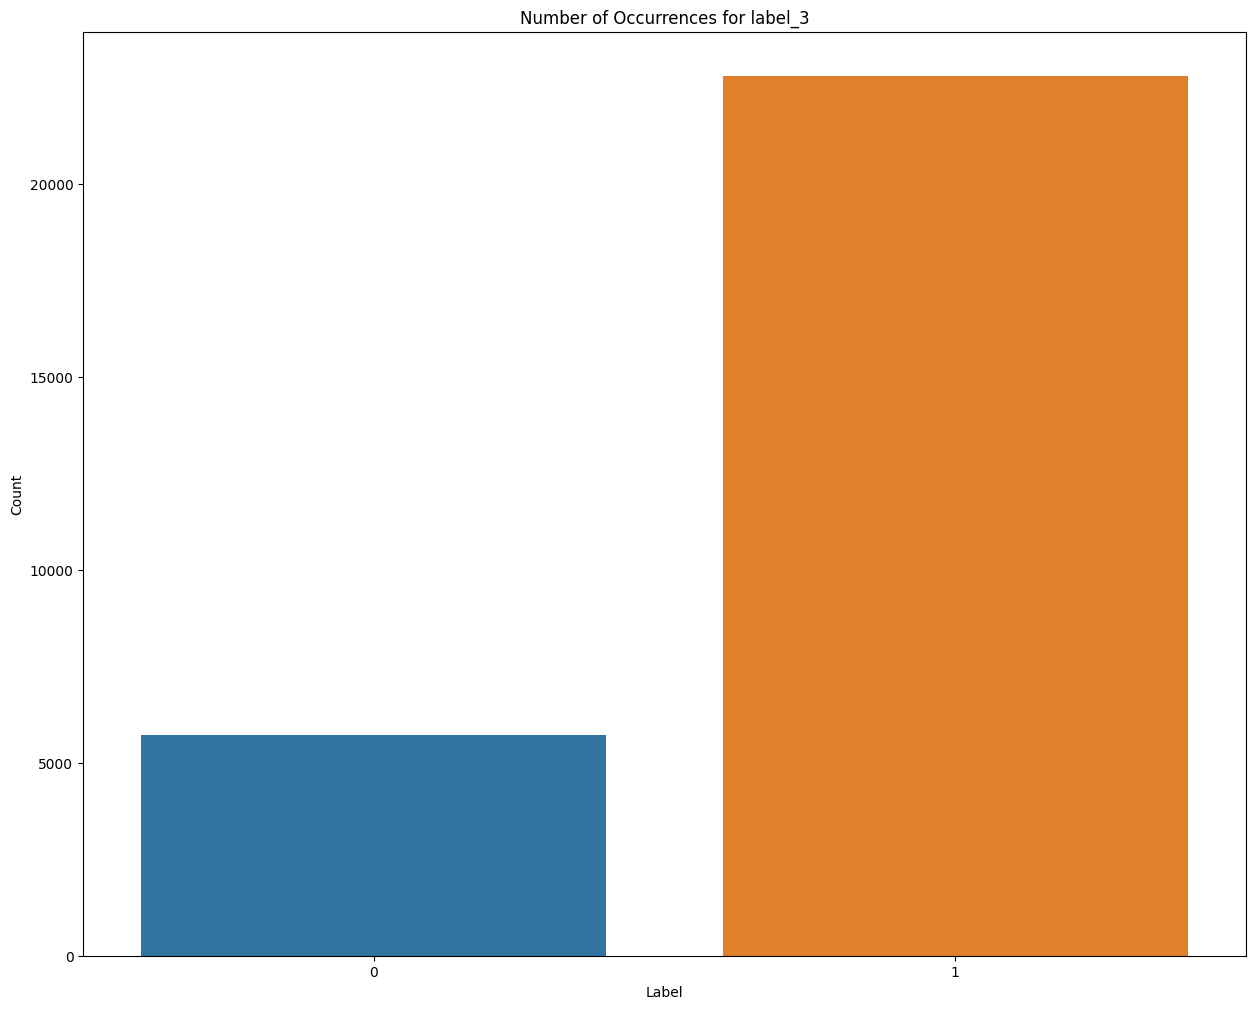

In [24]:
plt.figure(figsize=(15, 12))
sns.countplot(data=Y_gender_train_df, x='label_3')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Occurrences for label_3')
plt.show()

There is a bias in the above dataset. Most of the data are biased to value "1". Therefore lets resample this.

In [25]:
# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [26]:
# Fit and apply the resampling to your data
X_train_resampled, Y_gender_train_resampled = ros.fit_resample(X_train, Y_gender_train)

In [27]:
Y_gender_train_df = Y_gender_train_resampled.to_frame()

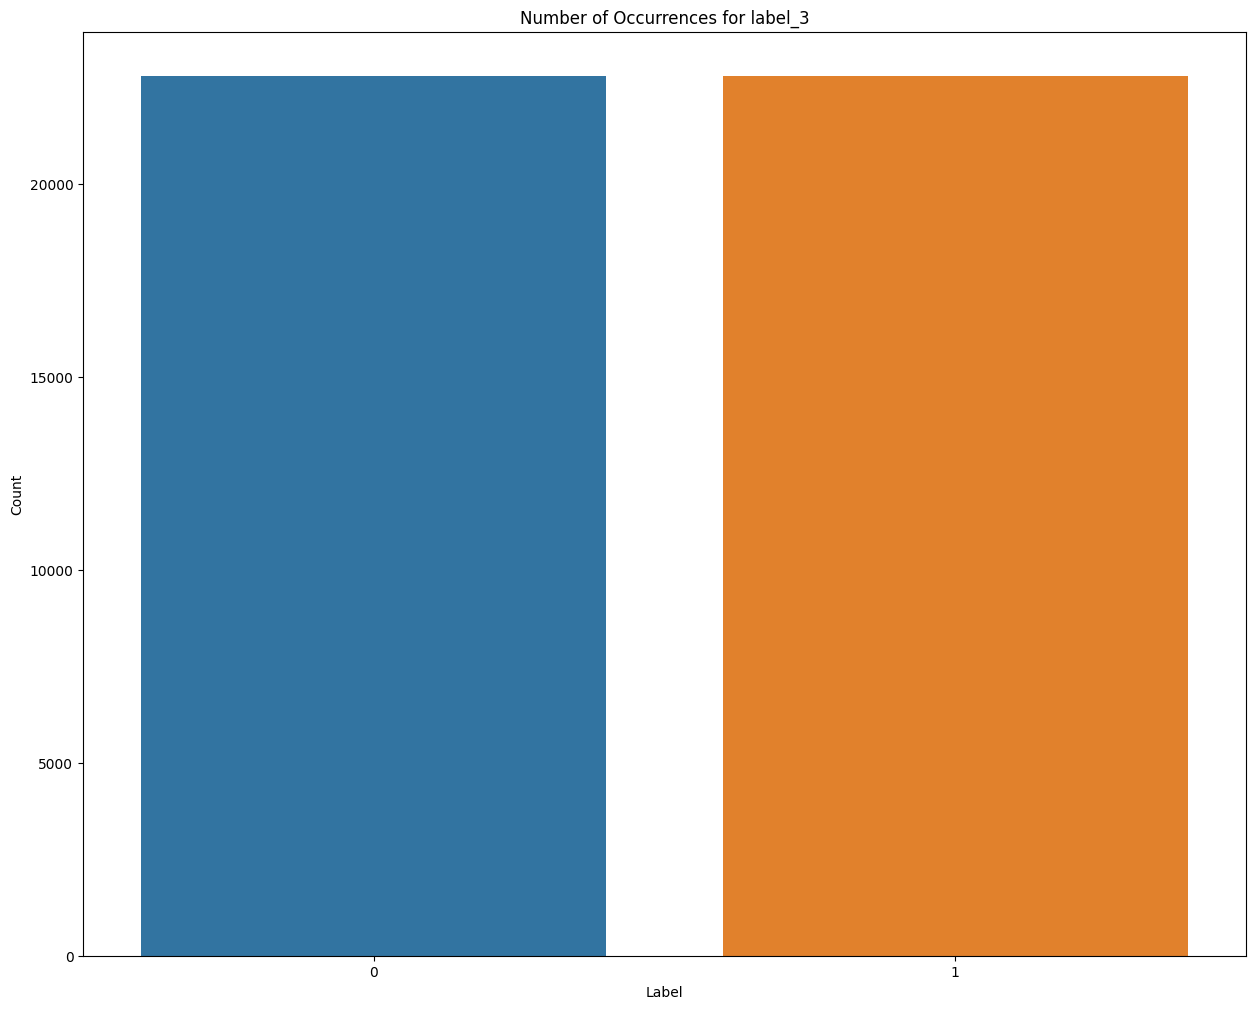

In [28]:
plt.figure(figsize=(15, 12))
sns.countplot(data=Y_gender_train_df, x='label_3')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Occurrences for label_3')
plt.show()

In [29]:
# Update the values with resampled data
Y_gender_train = Y_gender_train_resampled

Now check the correlation between the features

In [30]:
X_train_label_3 = X_train_resampled.copy()
X_valid_label_3 = X_valid.copy()
X_test_label_3 = test_data.loc[:, 'feature_1':'feature_768'].copy()

In [31]:
corr_before_feature_engineering_label_3 = X_train_label_3.corr()

<Axes: >

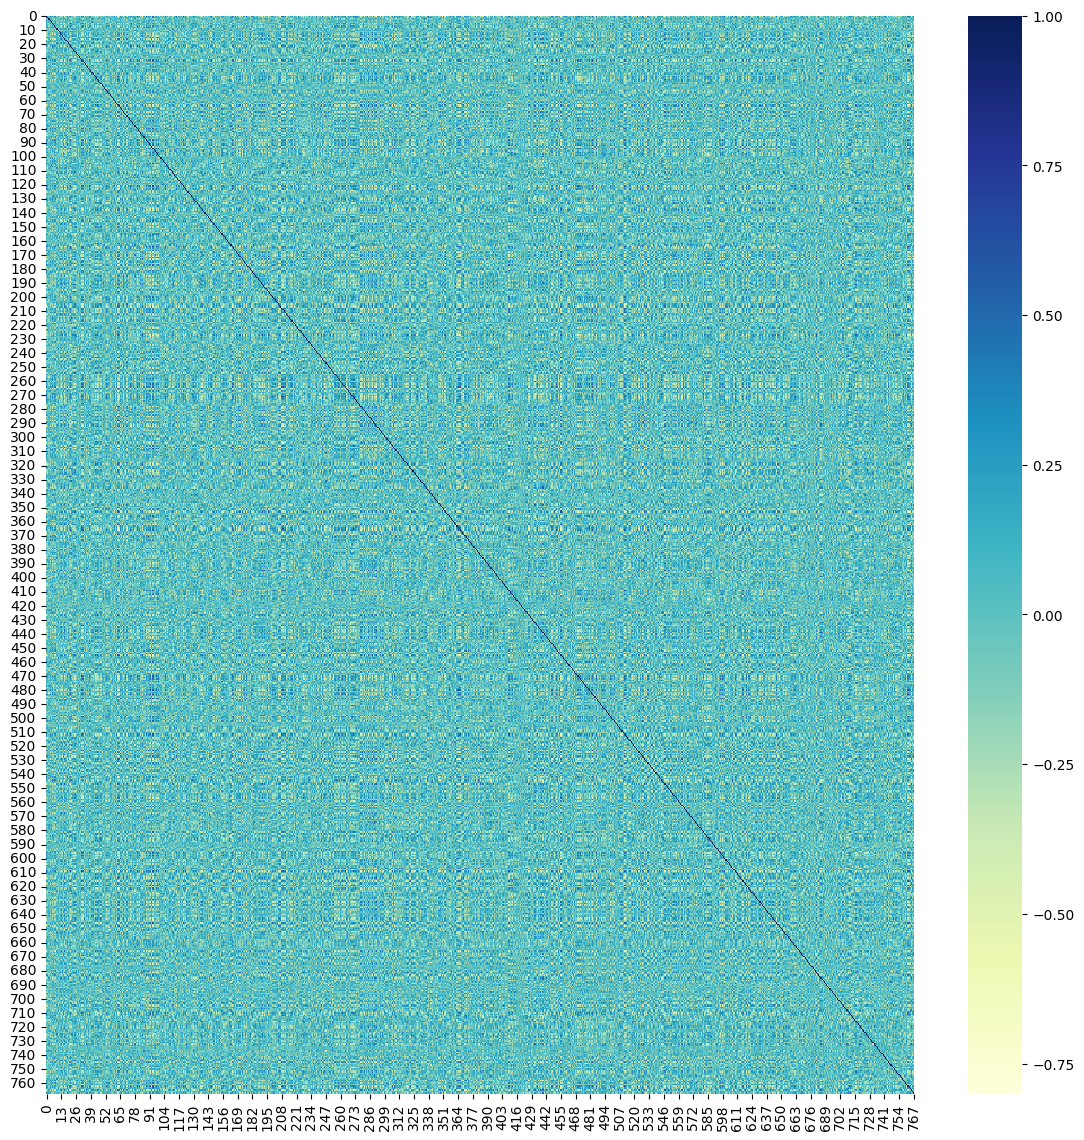

In [32]:
plt.figure(figsize=(14, 14))
plt.xticks(rotation=90)
sns.heatmap(corr_before_feature_engineering_label_3, cmap="YlGnBu")

Now select best model to predict 'Label_3'

In [33]:
score_knn = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train_label_3, Y_gender_train,cv=3)
score_svm = cross_val_score(svm.SVC(kernel='linear', probability=True, class_weight='balanced'),X_train_label_3, Y_gender_train,cv=3)
score_rfc = cross_val_score(RandomForestClassifier(n_estimators=5),X_train_label_3, Y_gender_train, cv=3)
print(f"Score for knn: {score_knn}")
print(f"Score for svm: {score_svm}")
print(f"Score for RFC:{score_rfc}")

Score for knn: [0.93005659 0.93979075 0.9492005 ]
Score for svm: [0.98881432 0.99269593 0.99802593]
Score for RFC:[0.96789051 0.96907284 0.98091729]


Therefore SVM model has the best value. Let's work with this model for further fine tuning tasks.

In [31]:
svc_label_3 = svm.SVC(kernel='linear', class_weight = 'balanced', probability = True)
svc_label_3.fit(X_train_label_3, Y_gender_train_df)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(class_weight='balanced', kernel='linear', probability=True)

In [32]:
y_predict_label_3 = svc_label_3.predict(X_valid_label_3)

In [33]:
print(metrics.confusion_matrix(Y_gender_valid, y_predict_label_3))
print(metrics.accuracy_score(Y_gender_valid, y_predict_label_3))
print(metrics.precision_score(Y_gender_valid, y_predict_label_3, average = 'weighted'))
print(metrics.recall_score(Y_gender_valid, y_predict_label_3, average = 'weighted'))

[[141   1]
 [  4 604]]
0.9933333333333333
0.9934370665906718
0.9933333333333333


Let's try to do the hyper parameter fine tuning with SVM model. I used PCA for fearure reduction.

In [34]:
pipeline = Pipeline([
    ('pca', PCA()),
    ('svm', svm.SVC())
])

In [45]:
param_grid = {
    'pca__n_components': [0.95],  # Number of principal components to retain
    'svm__C': [0.1],         # SVM regularization parameter
    'svm__kernel': ['rbf'],         # SVM kernel
    'svm__class_weight': ['balanced'],
#     'svm__probability': [True]
}

In [46]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_label_3, Y_gender_train)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('pca', PCA()), ('svm', SVC())]),
             param_grid={'pca__n_components': [0.94], 'svm__C': [0.1],
                         'svm__class_weight': ['balanced'],
                         'svm__kernel': ['rbf']},
             scoring='accuracy')

In [47]:
# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [48]:
best_params

{'pca__n_components': 0.94,
 'svm__C': 0.1,
 'svm__class_weight': 'balanced',
 'svm__kernel': 'rbf'}

In [49]:
accuracy = best_model.score(X_valid, Y_gender_valid)

In [50]:
accuracy

0.9933333333333333

In [51]:
y_pred_with_grid_search_label_3 = best_model.predict(X_valid)

In [52]:
print(metrics.confusion_matrix(Y_gender_valid, y_pred_with_grid_search_label_3))
print(metrics.accuracy_score(Y_gender_valid, y_pred_with_grid_search_label_3))
print(metrics.precision_score(Y_gender_valid, y_pred_with_grid_search_label_3, average = 'weighted'))
print(metrics.recall_score(Y_gender_valid, y_pred_with_grid_search_label_3, average = 'weighted'))

[[141   1]
 [  4 604]]
0.9933333333333333
0.9934370665906718
0.9933333333333333


Using SHAP Explainable AI

In [45]:
def svc_predictor_label_3(X):
    return best_model.decision_function(X)

In [ ]:
explainer_label_3 = shap.Explainer(svc_predictor_label_3, X_train_label_3)
shap_values_label_3 = explainer_label_3.shap_values(X_valid_label_3)
shap.summary_plot(shap_values_label_3, X_valid_label_3, feature_names=X.columns)

In [53]:
y_predict_final_label_3 = best_model.predict(X_test_label_3)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [114]:
saveModel("best_pca__n_0.83_svm__C_23_svm__kernel_rbf", best_model)

# Find best classifier model for Label 4

In [48]:
# load data in Train dataset
X_train = train_data.loc[:, 'feature_1':'feature_768']
Y_accent_train = train_data['label_4']

In [49]:
# load data in Valid dataset
X_valid = valid_data.loc[:, 'feature_1':'feature_768']
Y_accent_valid = valid_data['label_4']

In [50]:
Y_accent_train_df = Y_accent_train.to_frame()

Let's check the nature of the Label 4

In [51]:
Y_accent_train_df.describe()

label_4
count  28520.000000
mean       5.997125
std        2.375567
min        0.000000
25%        6.000000
50%        6.000000
75%        6.000000
max       13.000000

In [52]:
robustScaler= RobustScaler()
X_train = pd.DataFrame(robustScaler.fit_transform(X_train))
X_valid = pd.DataFrame(robustScaler.fit_transform(X_valid))

Next check are there any null values in the Label 4 column.

In [53]:
null_values = Y_accent_train_df['label_4'].isnull()
null_count = null_values.sum()

print(f"Number of null values in 'label_4': {null_count}")

Number of null values in 'label_4': 0


Therefore there is not any null values. Now Let's check the value distribution with a graph.

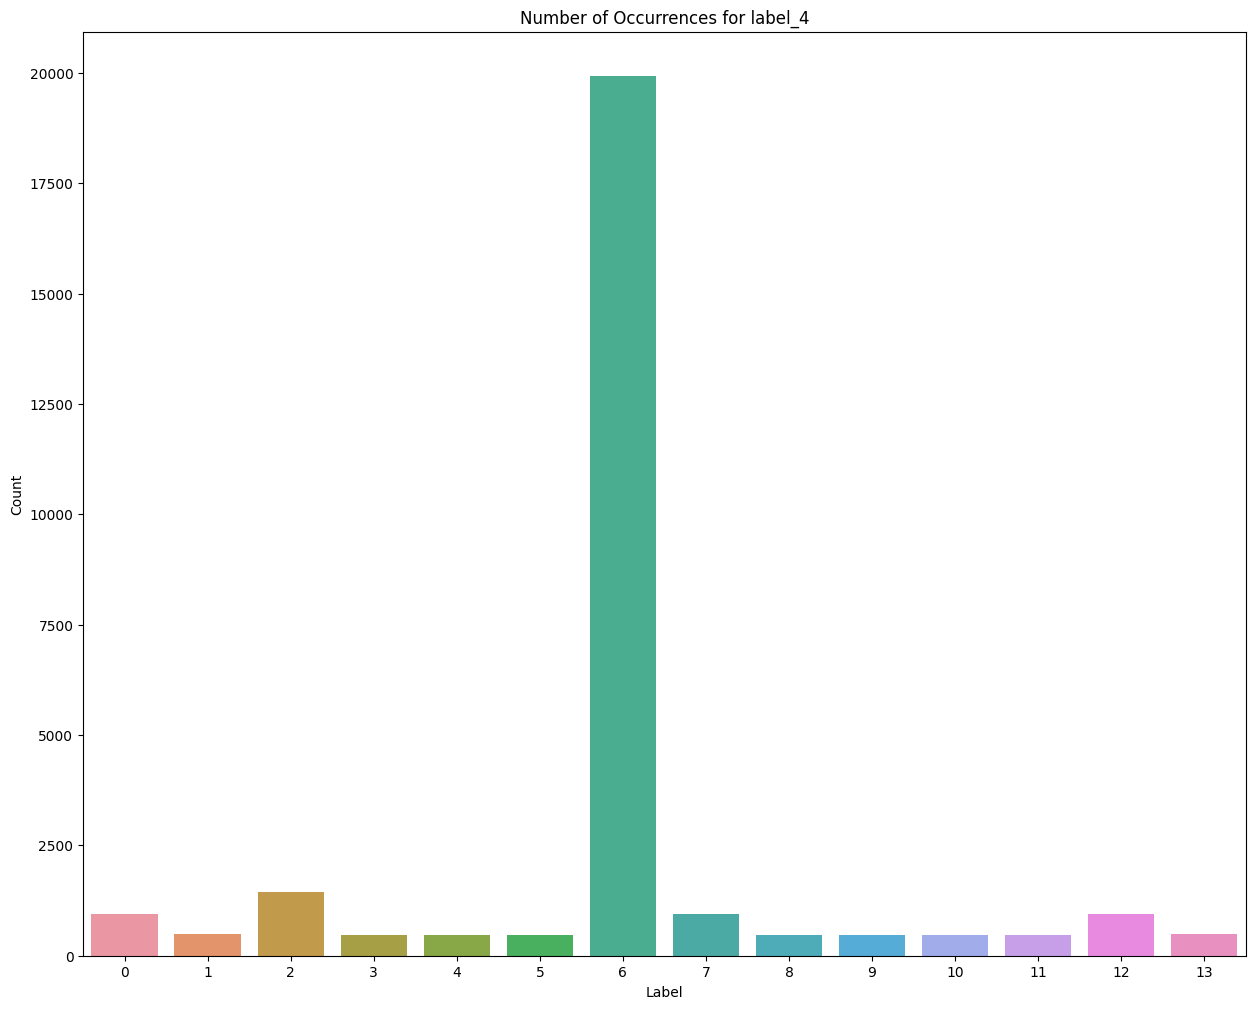

In [54]:
plt.figure(figsize=(15, 12))
sns.countplot(data=Y_accent_train_df, x='label_4')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Occurrences for label_4')
plt.show()

The dataset for Label 4 biased to value '6'. We need consider this for future evaluations.

In [ ]:
# Create a SMOTE and RandomUnderSampler pipeline
pipeline = iPipeline([
    ('oversample', SMOTE(sampling_strategy='auto', random_state=42)),
    ('undersample', RandomUnderSampler(sampling_strategy='auto', random_state=42))
])

In [ ]:
# Fit and apply the pipeline to your data
X_train_resampled, Y_accent_resampled = pipeline.fit_resample(X_train, Y_accent_train)

In [ ]:
Y_accent_train = Y_accent_resampled

Now check the correlation between the features

In [ ]:
X_train_label_4 = X_train_resampled.copy()
X_valid_label_4 = X_valid.copy()
X_test_label_4 = test_data.loc[:, 'feature_1':'feature_768'].copy()

In [ ]:
corr_before_feature_engineering_label_4 = X_train_label_4.corr()

In [ ]:
plt.figure(figsize=(14, 14))
plt.xticks(rotation=90)
sns.heatmap(corr_before_feature_engineering_label_4, cmap="YlGnBu")

Lets select best model for classification in Label 4

In [ ]:
score_knn = cross_val_score(KNeighborsClassifier(n_neighbors= 10), X_train_label_2, Y_age_train,cv=3)
score_svm = cross_val_score(svm.SVC(kernel='linear', probability=True, class_weight='balanced'),X_train_label_2, Y_age_train,cv=3)
print(f"Score for knn: {score_knn}")
print(f"Score for svm: {score_svm}")

Both models' results are close to each other. Therefore lets consider both results

First lets consider KNN classifier

In [ ]:
knn_label_4 = KNeighborsClassifier(n_neighbors=5)
knn_label_4.fit(X_train_label_4, Y_accent_train)

In [ ]:
y_predict_label_4 = knn_label_4.predict(X_valid_label_4)

In [ ]:
print(metrics.confusion_matrix(Y_accent_valid, y_predict_label_4))
print(metrics.accuracy_score(Y_accent_valid, y_predict_label_4))
print(metrics.precision_score(Y_accent_valid, y_predict_label_4, average = 'weighted'))
print(metrics.recall_score(Y_accent_valid, y_predict_label_4, average = 'weighted'))

Lets do the hyper parameter tuning and find the best model by changing the parameters. I use PCA for feature reduction task

In [ ]:
pipeline = Pipeline([
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])

Check best model by changinge following parameters

In [ ]:
param_grid = {
    'pca__n_components': [0.95],  # Number of principal components
    'knn__n_neighbors': [5, 10, 20],  
    'knn__weights': ['distance'],
}

In [ ]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_label_4, Y_accent_train)

In [ ]:
best_model_knn = grid_search.best_estimator_
best_params_knn = grid_search.best_params_
best_score_knn = grid_search.best_score_

In [ ]:
best_params_knn

In [ ]:
accuracy_knn = best_model_knn.score(X_valid, Y_accent_valid)

In [ ]:
y_pred_with_grid_search_label_2_knn = best_model_knn.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(Y_accent_valid, y_pred_with_grid_search_label_2_knn))
print(metrics.accuracy_score(Y_accent_valid, y_pred_with_grid_search_label_2_knn))
print(metrics.precision_score(Y_accent_valid, y_pred_with_grid_search_label_2_knn, average = 'weighted'))
print(metrics.recall_score(Y_accent_valid, y_pred_with_grid_search_label_2_knn, average = 'weighted'))

Now lets consdier SVM model for classification in Label 4

In [ ]:
svc_label_4 = svm.SVC(kernel='rbf', class_weight = 'balanced', probability = True)
svc_label_4.fit(X_train_label_4, Y_accent_train)

In [ ]:
y_predict_label_4 = svc_label_4.predict(X_valid_label_4)

In [ ]:
print(metrics.confusion_matrix(Y_accent_valid, y_predict_label_4))
print(metrics.accuracy_score(Y_accent_valid, y_predict_label_4))
print(metrics.precision_score(Y_accent_valid, y_predict_label_4, average = 'weighted'))
print(metrics.recall_score(Y_accent_valid, y_predict_label_4, average = 'weighted'))

Lets do hyper parameter fine tuning for find best model for Label 4. I used PCA for feature reduction.

In [ ]:
pipeline = Pipeline([
    ('pca', PCA()),
    ('svm', svm.SVC())
])

Changed values and found model with the best resuls

In [ ]:
param_grid = {
    'pca__n_components': [0.95],  # Number of principal components to retain
    'svm__C': [20],         # SVM regularization parameter
    'svm__kernel': ['rbf'],         # SVM kernel
    'svm__class_weight': ['balanced'],
    'svm__probability': [True]
}

In [ ]:
X_train_label_4.shape

In [ ]:
Y_accent_resampled.shape

In [ ]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_label_4, Y_accent_resampled)

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
best_params

In [ ]:
accuracy = best_model.score(X_valid, Y_accent_valid)

In [ ]:
y_pred_with_grid_search_label_4 = best_model.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(Y_accent_valid, y_pred_with_grid_search_label_4))
print(metrics.accuracy_score(Y_accent_valid, y_pred_with_grid_search_label_4))
print(metrics.precision_score(Y_accent_valid, y_pred_with_grid_search_label_4, average = 'weighted'))
print(metrics.recall_score(Y_accent_valid, y_pred_with_grid_search_label_4, average = 'weighted'))

Using SHAP Explainable AI

In [45]:
def svc_predictor_label_4(X):
    return best_model.decision_function(X)

In [ ]:
explainer_label_4 = shap.Explainer(svc_predictor_label_4, X_train_label_4)
shap_values_label_4 = explainer_label_4.shap_values(X_valid_label_4)
shap.summary_plot(shap_values_label_4, X_valid_label_4, feature_names=X.columns)

In [ ]:
y_predict_final_label_4 = best_model.predict(X_test_label_4)

In [ ]:
saveModel("pca__n_0.95_svm__C_54_svm__kernel_rbf", best_model)

In [ ]:
y_predict_final_label_4

# Combine All Results

In [ ]:
final_result_all = pd.concat([test_data['ID'], pd.Series(y_predict_final_label_1, name='label_1'), pd.Series(y_predict_final_label_2, name='label_2'), pd.Series(y_predict_final_label_3, name='label_3'), pd.Series(y_predict_final_label_4, name='label_4')], axis=1)

In [ ]:
final_result_all

In [ ]:
final_result_all.to_csv('190050K layer 10 new_2.csv', index=False)